# Robhacks

Model training notebook to train a model to detect whether a given URL could be a phishing attempt. Dataset taken from: https://gregavrbancic.github.io/Phishing-Dataset/ , used the dataset_small.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np

# Scikit-learn libraries for preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/dataset_small.csv')

# Display the first few rows to verify the data loaded correctly.
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


In [4]:
# Step 3: Explore and Clean the Data

# Check data dimensions and column names
print("Dataset shape:", df.shape)
print("Columns:\n", df.columns)

# Check for missing values
print("Columns with missing values:\n", df.isnull().sum()[df.isnull().sum() != 0])

# If there are missing values, we will impute them.
# Here, we assume all columns except the target ('phishing') are numerical.

Dataset shape: (58645, 112)
Columns:
 Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)
Columns with missing values:
 Series([], dtype: int64)


In [5]:
# Step 4: Preprocess the Data

# Separate features and target variable
# 'phishing' is our target, and the rest are features.
features = df.columns.drop('phishing')
X = df[features]
y = df['phishing']

# Standardize (scale) the features so that they have mean=0 and std=1.
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

# View the summary of the preprocessed features.
X_scaled.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
qty_dot_url,58645.0,1.784687e-16,1.000009,-0.871804,-0.193008,-0.193008,0.485789,14.740509
qty_hyphen_url,58645.0,-4.919095e-17,1.000009,-0.341308,-0.341308,-0.341308,-0.341308,25.791192
qty_underline_url,58645.0,-3.634800e-18,1.000009,-0.213596,-0.213596,-0.213596,-0.213596,25.973809
qty_slash_url,58645.0,-2.932072e-17,1.000009,-0.950928,-0.950928,-0.460132,0.521459,20.644082
qty_questionmark_url,58645.0,-6.057999e-18,1.000009,-0.102073,-0.102073,-0.102073,-0.102073,65.042377
...,...,...,...,...,...,...,...,...
tls_ssl_certificate,58645.0,5.282575e-17,1.000009,-1.002749,-1.002749,0.997258,0.997258,0.997258
qty_redirects,58645.0,8.505431e-17,1.000009,-1.598682,-0.372152,-0.372152,0.854377,20.478852
url_google_index,58645.0,-2.798796e-17,1.000009,-26.630700,-0.034014,-0.034014,-0.034014,26.562672
domain_google_index,58645.0,7.542209e-18,1.000009,-20.911676,-0.046608,-0.046608,-0.046608,20.818460


In [6]:
# Step 5: Split the Data into Training and Testing Sets

# Using 80% of the data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (46916, 111)
Test set shape: (11729, 111)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
!pip install onnxmltools
!pip install skl2onnx
import onnxmltools
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 4.9 MB/s eta 0:00:00


In [9]:
# Grid Search for Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [10]:
# Train best model
best_model = grid_search.best_estimator_
# Make predictions on the test set.
y_pred = best_model.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      5596
           1       0.96      0.96      0.96      6133

    accuracy                           0.96     11729
   macro avg       0.96      0.96      0.96     11729
weighted avg       0.96      0.96      0.96     11729



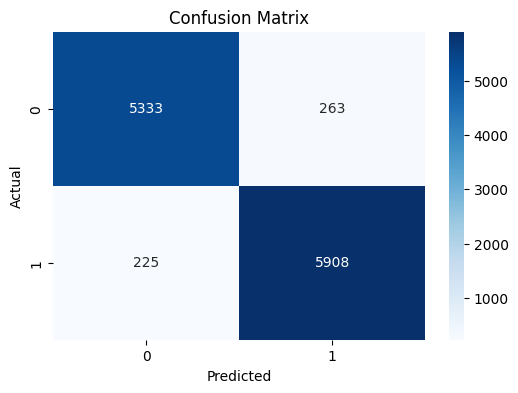

In [11]:
# Step 7: Evaluate the Model

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# Convert model to ONNX
initial_type = [('input', FloatTensorType([None, X_train.shape[1]]))]
onnx_model = convert_sklearn(best_model, initial_types=initial_type)

# Save ONNX model
with open("phishshield_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("ONNX model saved as phishshield_model.onnx")

ONNX model saved as phishshield_model.onnx
